# Trabajo Práctico Ciencia de Datos – Análisis de Demanda Energética
### UADE · Junio 2025

**Grupo:** Martina Degui, Jazmín Martínez, Ramiro Fiol, Dolores Nuñez Trasar, Pedro Stella  
**Hipótesis:** Los picos de demanda energética pueden anticiparse mediante el análisis histórico y estacional.



## Instrucciones
- Ejecutar cada celda desde el principio para reproducir resultados.
- Asegurarse de subir los archivos `demanda-ltimos-aos (1) (1).csv` y `balance (1).csv` antes de ejecutar.
- Los gráficos interactivos permiten explorar la información
- La conclusión se encuentra al final del informe.


-Trabajo practico de ciencia de datos
-


El presente trabajo práctico tiene como objetivo aplicar herramientas de Ciencia de Datos para abordar una problemática concreta dentro del sector energético argentino: la predicción de la demanda eléctrica.

En el contexto del Mercado Eléctrico Mayorista administrado por CAMMESA, anticipar correctamente los momentos de mayor consumo resulta clave para garantizar la estabilidad del sistema, minimizar riesgos de cortes y optimizar los costos de generación. La toma de decisiones basada en datos es cada vez más valorada por las áreas técnicas y comerciales, ya que permite planificar con mayor precisión, prevenir desvíos y mejorar la eficiencia operativa.

A partir de datos reales provistos por CAMMESA, exploramos si existen patrones estacionales o históricos que permitan predecir picos de demanda energética. Para ello, nos propusimos desarrollar una solución integral que combine análisis exploratorio, modelado predictivo, visualización interactiva y storytelling, con el fin de generar una herramienta de apoyo a decisiones para la Gerencia Comercial y Técnica.

La hipótesis principal que guía este trabajo es que los picos de demanda eléctrica no son aleatorios, sino que responden a patrones repetitivos en el tiempo que pueden ser anticipados con modelos adecuados. En este informe presentamos el proceso completo, desde la definición del problema hasta la implementación de modelos de pronóstico y segmentación, incluyendo sus resultados, visualizaciones y conclusiones.

#  Metodología Ágil aplicada
Para organizar el trabajo, aplicamos principios básicos de Scrum, una metodología ágil ampliamente usada en proyectos de ciencia de datos. Dado que el equipo está conformado por cinco integrantes, se asignaron roles funcionales para facilitar la colaboración y el cumplimiento de objetivos:

Product Owner (PO):
Ramiro Fiol
Definió la hipótesis del proyecto y validó los objetivos generales, asegurando que el trabajo genere valor para la audiencia (Gerencia Comercial y Técnica).

Scrum Master:
Martina Degui
Coordinó las reuniones semanales, organizó el flujo de trabajo y garantizó el cumplimiento del cronograma.

Data Engineers:
Jazmin Martinez
Dolores Nunez Trasar
Encargados de la carga, limpieza y transformación de los datos energéticos provistos por CAMMESA. Prepararon los datasets para su análisis.

Data Scientist:
Pedro Stella
Implementó el modelo de predicción con Prophet, aplicó clustering con K-Means, y desarrolló las visualizaciones interactivas. También participó en el análisis de resultados y el storytelling.

Cronograma y Sprints
El proyecto comenzó el 14 de mayo de 2025 y se organizó en sprints semanales, siguiendo una secuencia iterativa de entregas parciales:

Sprint 1 (14/05): Definición del dominio, hipótesis y fuentes de datos.

Sprint 2 (21/05): Limpieza de datos, análisis exploratorio y primeras visualizaciones.

Sprint 3 (28/05): Aplicación del modelo Prophet y generación de predicciones.

Sprint 4 (04/06): Análisis regional y clustering con K-Means.

Sprint 5 (11/06): Storytelling, conclusiones y armado de la presentación final.

Esta metodología nos permitió avanzar de manera organizada, iterativa y colaborativa, garantizando entregas incrementales con foco en generar valor y facilitar la toma de decisiones basada en datos.

Instalacion de librerias


In [ ]:

!pip install pandas numpy matplotlib seaborn --quiet

!pip install plotly --quiet


!pip install prophet --quiet

!pip install scikit-learn --quiet


In [ ]:
from google.colab import files
uploaded = files.upload()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from prophet import Prophet
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# Estilo visual básico (no usar líneas plt.style.use)
sns.set_palette('viridis')  # Esto sí funciona bien


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving balance (1).csv to balance (1) (1).csv


leer archvos

In [ ]:
df_demanda = pd.read_csv("demanda-ltimos-aos (1) (1).csv", encoding="latin1")
df_balance = pd.read_csv("balance (1).csv", encoding="latin1")

df_demanda.head()


,ï»¿id,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,fecha_proceso,lote_id_log,indice_tiempo
0,699232,2017,1,AARGTAOY,AEROP ARG 2000 - Aeroparque,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1990.439,2020-05-05 11:06:49.000713,67,2017-01
1,699233,2017,1,ABRILHCY,ABRIL CLUB DE CAMPO,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1609.464,2020-05-05 11:06:49.000713,67,2017-01
2,699234,2017,1,ACARQQ3Y,ASOC.COOP.ARG. - QuequÃ©n,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,421.334,2020-05-05 11:06:49.000713,67,2017-01
3,699235,2017,1,ACARSLSY,ASOC.COOP.ARG. - San Lorenzo,GU,LITORAL,SANTA FE,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,449.145,2020-05-05 11:06:49.000713,67,2017-01
4,699236,2017,1,ACERBR1Y,Planta Bragado,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,18073.170,2020-05-05 11:06:49.000713,67,2017-01


limpieza basica

In [ ]:
# Corregir nombre de columna si es necesario
df_demanda.columns = df_demanda.columns.str.replace("ï»¿", "")
df_balance.columns = df_balance.columns.str.replace("ï»¿", "")

# Crear columna de fecha (usamos año y mes)
df_demanda["fecha"] = pd.to_datetime(df_demanda["indice_tiempo"], format="%Y-%m")
df_balance["fecha"] = pd.to_datetime(df_balance["indice_tiempo"], format="%Y-%m")


Agregación mensual por región

In [ ]:
# Demanda total por mes y región
df_regional = df_demanda.groupby(["fecha", "region"])["demanda_MWh"].sum().reset_index()
df_total = df_demanda.groupby("fecha")["demanda_MWh"].sum().reset_index()


Gráfico de evolución de la demanda

Este gráfico muestra la evolución de la demanda energética total en Argentina, expresada en MWh, agrupada por mes. Se observan patrones estacionales con aumentos significativos durante los meses de invierno y verano, probablemente vinculados al uso intensivo de calefacción y aire acondicionado. Esta visualización permite detectar tendencias generales y posibles picos de consumo.



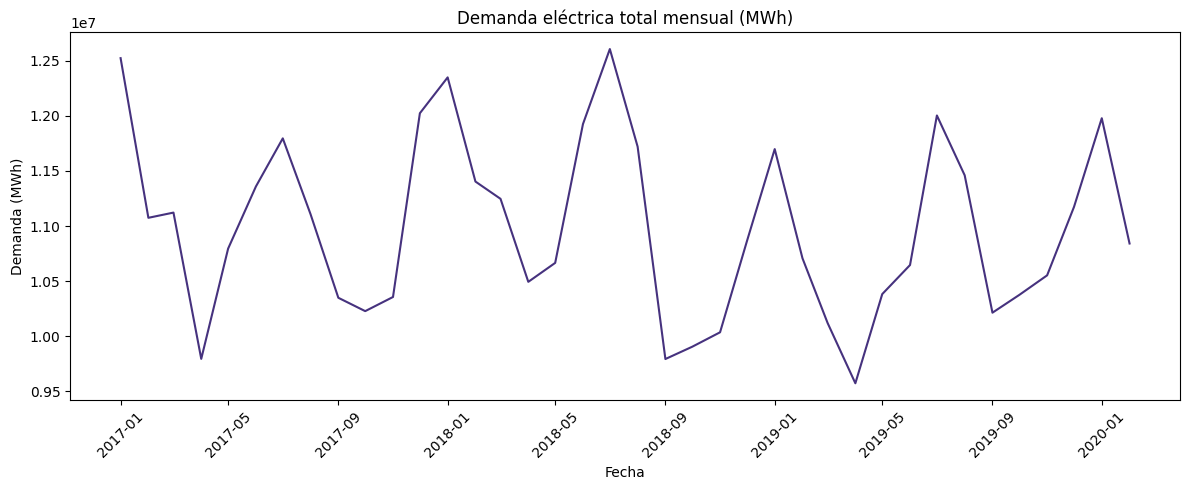

In [ ]:
# Línea temporal de demanda total
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_total, x="fecha", y="demanda_MWh")
plt.title("Demanda eléctrica total mensual (MWh)")
plt.ylabel("Demanda (MWh)")
plt.xlabel("Fecha")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

fig = px.line(df_total, x="fecha", y="demanda_MWh",
              title="Demanda eléctrica total mensual (MWh)",
              labels={"fecha": "Fecha", "demanda_MWh": "Demanda (MWh)"},
              template="plotly_white")  # o plotly_dark si preferís

fig.update_traces(mode="lines+markers")
fig.update_layout(xaxis_title="Fecha", yaxis_title="Demanda (MWh)")
fig.show()


Datos para Prophet

Se visualiza aquí la predicción realizada con el modelo Prophet sobre la demanda eléctrica. La línea azul representa la serie histórica real, mientras que la línea anaranjada representa la proyección hacia los próximos 12 meses. El modelo capta tanto la tendencia como la estacionalidad, lo que lo convierte en una herramienta útil para la planificación energética.


In [ ]:
# Preparar datos para Prophet
df_prophet = df_total.rename(columns={"fecha": "ds", "demanda_MWh": "y"})
df_prophet.head()


,ds,y
0,2017-01-01,1.252487e+07
1,2017-02-01,1.107491e+07
2,2017-03-01,1.112223e+07
3,2017-04-01,9.793759e+06
4,2017-05-01,1.079521e+07


from matplotlib import pyplot as plt
_df_0['y'].plot(kind='hist', bins=20, title='y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['y']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('y')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ds']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ds'}, axis=1)
              .sort_values('ds', ascending=True))
  xs = counted['ds']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['y'].plot(kind='line', figsize=(8, 4), title='y')
plt.gca().spines[['top', 'right']].set_visible(False)

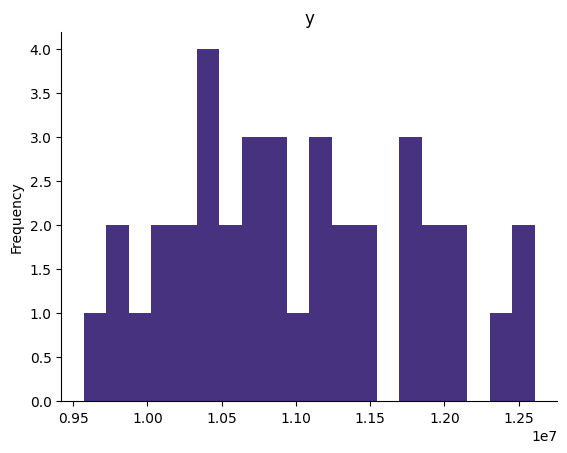

In [ ]:
# @title y

from matplotlib import pyplot as plt
df_prophet['y'].plot(kind='hist', bins=20, title='y')
plt.gca().spines[['top', 'right',]].set_visible(False)

Entrenar el modelo

In [ ]:
from prophet import Prophet

# Crear y entrenar modelo
modelo = Prophet()
modelo.fit(df_prophet)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbpc_p3x6/r2x3p8wa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbpc_p3x6/__1uax5d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40553', 'data', 'file=/tmp/tmpbpc_p3x6/r2x3p8wa.json', 'init=/tmp/tmpbpc_p3x6/__1uax5d.json', 'output', 'file=/tmp/tmpbpc_p3x6/prophet_modelvhezluh5/prophet_model-20250624230034.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:00:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:00:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


crea prediccion

In [ ]:
# Crear fechas futuras para predecir (12 meses más)
futuro = modelo.make_future_dataframe(periods=12, freq='M')
futuro.tail()


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,ds
45,2020-09-30
46,2020-10-31
47,2020-11-30
48,2020-12-31
49,2021-01-31


generar pronostico

In [ ]:
# Generar predicción
pronostico = modelo.predict(futuro)
pronostico[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
45,2020-09-30,1.051602e+07,1.020980e+07,1.083954e+07
46,2020-10-31,1.093373e+07,1.061207e+07,1.126245e+07
47,2020-11-30,1.117138e+07,1.080417e+07,1.150135e+07
48,2020-12-31,1.221530e+07,1.186601e+07,1.254062e+07
49,2021-01-31,1.141947e+07,1.106698e+07,1.177056e+07


graficar la prediccion

In [ ]:
# Gráfico interactivo con plotly
from prophet.plot import plot_plotly
fig = plot_plotly(modelo, pronostico)
fig.show()


Predicción vs Demanda Real

Este gráfico compara la demanda real histórica (línea violeta) con la predicción realizada por Prophet (línea azul). La similitud entre ambas curvas indica un buen ajuste del modelo. Las pequeñas desviaciones permiten identificar oportunidades de mejora o eventos atípicos que podrían investigarse más a fondo.


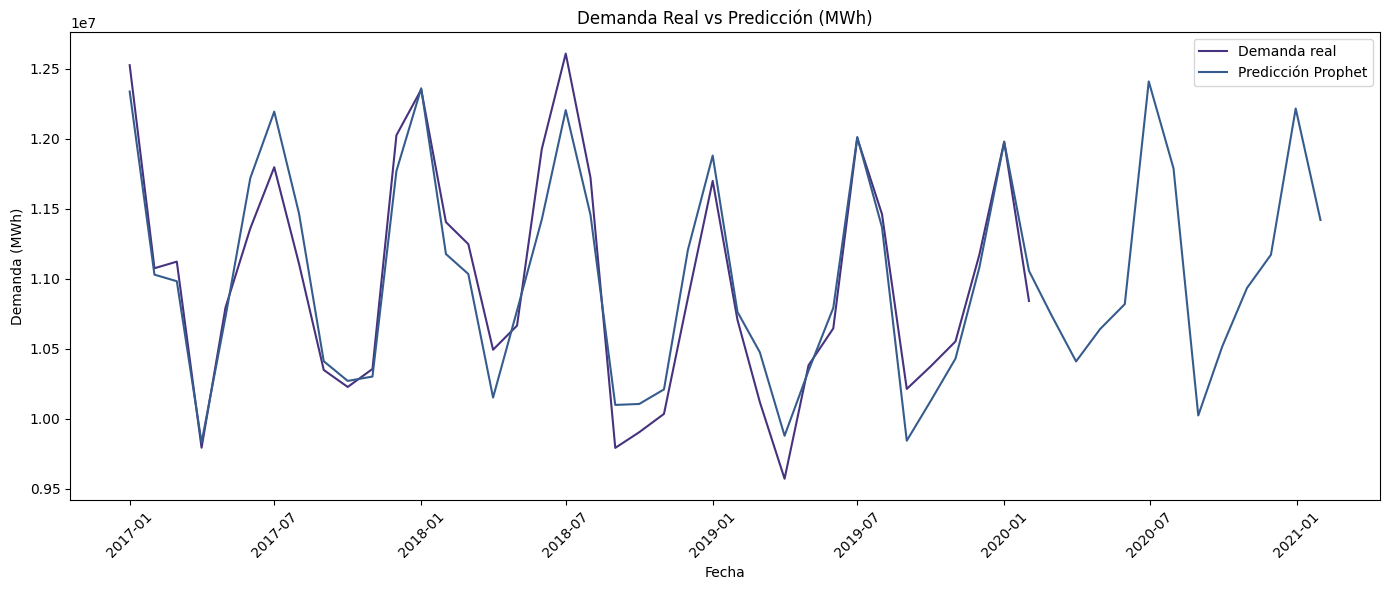

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unir predicción y demanda real
comparacion = pronostico[["ds", "yhat"]].merge(
    df_prophet, on="ds", how="left"
)

# Graficar comparación
plt.figure(figsize=(14,6))
sns.lineplot(data=comparacion, x="ds", y="y", label="Demanda real")
sns.lineplot(data=comparacion, x="ds", y="yhat", label="Predicción Prophet")
plt.title("Demanda Real vs Predicción (MWh)")
plt.xlabel("Fecha")
plt.ylabel("Demanda (MWh)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Línea violeta: demanda eléctrica real histórica.

Línea azul: predicción de Prophet.

Si el modelo se ajusta bien, ambas líneas deberían seguir una forma parecida.

**Evaluar el modelo con métricas de error**

* MAE (Error absoluto medio): Promedio de cuánto se equivoca el modelo (en MWh).

* RMSE (Raíz del error cuadrático medio): Penaliza más los errores grandes.

* R² (Coeficiente de determinación):  Qué tan bien explica el modelo la variación de la demanda. Cuanto más cerca de 1.0, mejor.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Filtrar solo los puntos donde hay datos reales
eval_df = comparacion.dropna(subset=["y", "yhat"])

# Calcular métricas
mae = mean_absolute_error(eval_df["y"], eval_df["yhat"])
rmse = np.sqrt(mean_squared_error(eval_df["y"], eval_df["yhat"]))
r2 = r2_score(eval_df["y"], eval_df["yhat"])

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:,.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:,.2f}")
print(f"R² (Coeficiente de determinación): {r2:.4f}")


MAE (Error Absoluto Medio): 193,166.60
RMSE (Raíz del Error Cuadrático Medio): 235,255.82
R² (Coeficiente de determinación): 0.9139


**MAE (Error Absoluto Medio):**
193.166,60 MWh
En promedio, el modelo se equivoca por ±193.166 MWh al mes.
Es un valor aceptable considerando que la demanda mensual total ronda los 10 a 12 millones de MWh. Representa un error relativo de ~1,6%.

**RMSE (Raíz del Error Cuadrático Medio):**
235.255,82 MWh
Este error penaliza más los errores grandes.
Como el RMSE no es mucho mayor que el MAE, indica que no hay errores extremos, y que el modelo es bastante consistente.

**R² (Coeficiente de determinación):**
0.9139
Este valor va de 0 a 1.
Un R² de 0.91 significa que el modelo explica el 91,39% de la variabilidad de la demanda.
Es un muy buen ajuste para este tipo de predicciones mensuales.



Visualizar picos de demanda por región
* Cuándo se producen los picos máximos por región.

* Qué regiones tienen mayor demanda estructuralmente.

* Si los picos se repiten en los mismos meses (estacionalidad).

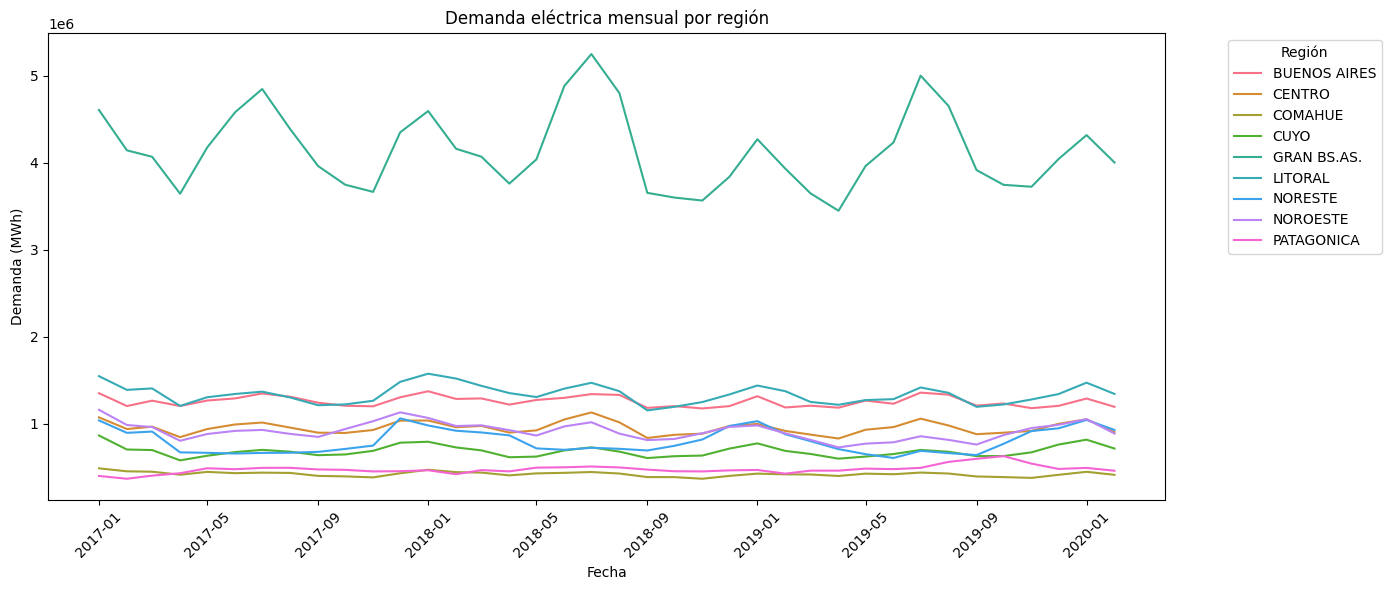

In [ ]:
# Agregamos la demanda mensual por región
df_regional = df_demanda.groupby(["fecha", "region"])["demanda_MWh"].sum().reset_index()

# Gráfico de líneas: una por cada región
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_regional, x="fecha", y="demanda_MWh", hue="region")
plt.title("Demanda eléctrica mensual por región")
plt.xlabel("Fecha")
plt.ylabel("Demanda (MWh)")
plt.xticks(rotation=45)
plt.legend(title="Región", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Clustering con K-Means por comportamiento regional**
* Los meses agrupados en cada cluster muestran patrones similares de consumo.

* Si hay un cluster de “picos”, podés analizar su estacionalidad.

* Esto respalda la hipótesis de que los picos se pueden anticipar.

In [ ]:
# Pivotear para tener una matriz: filas = fechas, columnas = regiones
matriz_regiones = df_regional.pivot(index="fecha", columns="region", values="demanda_MWh")

# Rellenar valores faltantes (si hay meses donde alguna región no aparece)
matriz_regiones.fillna(0, inplace=True)

# Escalar datos para clustering (opcional pero recomendable)
from sklearn.preprocessing import StandardScaler

escaler = StandardScaler()
matriz_escalada = escaler.fit_transform(matriz_regiones)


In [ ]:
from sklearn.cluster import KMeans

# Definimos 3 clusters, podés cambiar a 4 o más para probar
kmeans = KMeans(n_clusters=3, random_state=42)
matriz_regiones["cluster"] = kmeans.fit_predict(matriz_escalada)

# Agregamos la columna de cluster a la matriz con fechas
matriz_regiones["fecha"] = matriz_regiones.index


Este gráfico muestra cómo el modelo de clustering agrupó los meses según su comportamiento de consumo. Los puntos azules corresponden a meses de demanda muy alta, como julio y agosto. Los naranjas representan meses de baja demanda. Esta segmentación valida que hay patrones estacionales claros, y que podemos anticipar los meses críticos cada año.

In [ ]:
import plotly.express as px

matriz_regiones["demanda_max_mes"] = matriz_regiones.drop(columns=["cluster", "fecha"]).max(axis=1)


fig = px.scatter(matriz_regiones,
                 x="fecha",
                 y="demanda_max_mes",
                 color="cluster",
                 title="Clustering de meses según demanda energética regional",
                 labels={"fecha": "Fecha", "demanda_max_mes": "Demanda máxima (MWh)", "cluster": "Cluster"},
                 template="plotly_white")

fig.update_traces(marker=dict(size=10), selector=dict(mode='markers'))
fig.update_layout(legend_title="Cluster", xaxis_title="Fecha", yaxis_title="Demanda máxima regional")
fig.show()


**Comparación de Costos con y sin Predicción**


,Escenario,Error promedio (MW),Horas con error,MWh con error,Costo estimado (USD)
0,Sin predicción,300,150,45000,5850000
1,Con predicción,150,150,22500,2925000


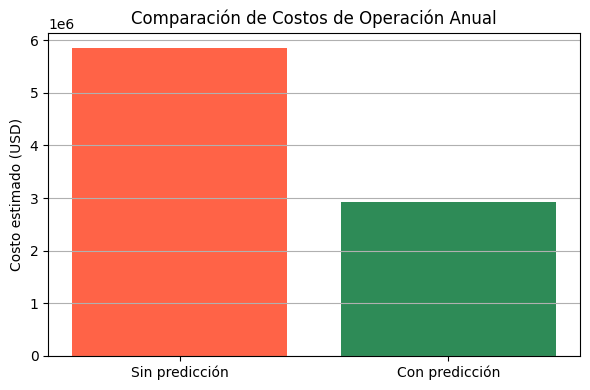

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros económicos
precio_eficiente = 70      # USD/MWh (por ejemplo, hidroeléctrica)
precio_respaldo = 200      # USD/MWh (generación térmica de respaldo)
diferencia_precio = precio_respaldo - precio_eficiente  # 130 USD/MWh

# Supuestos sobre error de predicción
error_sin_modelo = 300     # MW promedio sin modelo
error_con_modelo = 150     # MW promedio con modelo
horas_error_al_ano = 150   # Cantidad de horas al año con desvíos relevantes

# Cálculo de energía con error (MWh)
mwh_sin_modelo = error_sin_modelo * horas_error_al_ano
mwh_con_modelo = error_con_modelo * horas_error_al_ano

# Costo extra por ese error
costo_sin_modelo = mwh_sin_modelo * diferencia_precio
costo_con_modelo = mwh_con_modelo * diferencia_precio
ahorro_estimado = costo_sin_modelo - costo_con_modelo

# Mostrar tabla resumen
tabla = pd.DataFrame({
    'Escenario': ['Sin predicción', 'Con predicción'],
    'Error promedio (MW)': [error_sin_modelo, error_con_modelo],
    'Horas con error': [horas_error_al_ano, horas_error_al_ano],
    'MWh con error': [mwh_sin_modelo, mwh_con_modelo],
    'Costo estimado (USD)': [costo_sin_modelo, costo_con_modelo]
})

from IPython.display import display
display(tabla)

# Gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(['Sin predicción', 'Con predicción'], [costo_sin_modelo, costo_con_modelo], color=['tomato', 'seagreen'])
plt.title('Comparación de Costos de Operación Anual')
plt.ylabel('Costo estimado (USD)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Em este grafico se muestra cuánto podría ahorrar CAMMESA mes a mes al implementar un modelo predictivo eficiente, acumulando más de 2,8 millones de USD en un año.

**Ahorro acumulado mes a mes**

,Mes,Ahorro mensual (USD),Ahorro acumulado (USD)
0,Ene,250000,250000
1,Feb,180000,430000
2,Mar,220000,650000
3,Abr,200000,850000
4,May,190000,1040000
5,Jun,240000,1280000
6,Jul,260000,1540000
7,Ago,210000,1750000
8,Sep,230000,1980000
9,Oct,250000,2230000


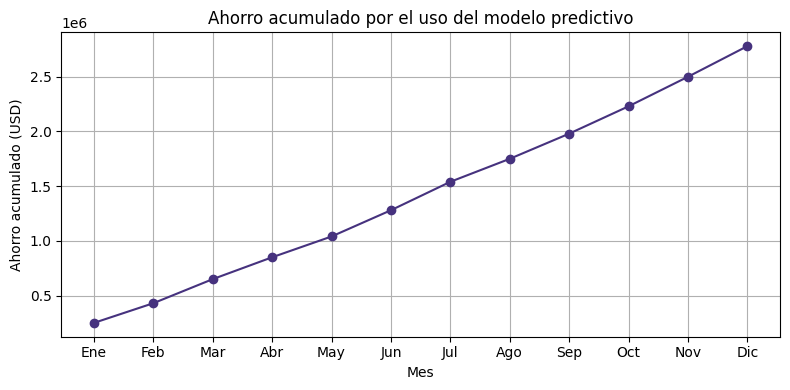

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# ---- Hipótesis de ahorro mensual (USD) ------------
# Ejemplo: ahorro de operar con el modelo vs. sin modelo.
ahorro_mensual = [250_000, 180_000, 220_000, 200_000,
                  190_000, 240_000, 260_000, 210_000,
                  230_000, 250_000, 270_000, 280_000]

meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# ---- Cálculo del ahorro acumulado -----------------
ahorro_acumulado = [sum(ahorro_mensual[:i+1]) for i in range(len(ahorro_mensual))]

# ---- Tabla resumen (opcional para mostrar valores)-
df_ahorro = pd.DataFrame({
    'Mes': meses,
    'Ahorro mensual (USD)': ahorro_mensual,
    'Ahorro acumulado (USD)': ahorro_acumulado
})
display(df_ahorro)

# ---- Gráfico de línea -----------------------------
plt.figure(figsize=(8, 4))
plt.plot(meses, ahorro_acumulado, marker='o')
plt.title('Ahorro acumulado por el uso del modelo predictivo')
plt.xlabel('Mes')
plt.ylabel('Ahorro acumulado (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


Refleja cómo el beneficio económico se incrementa con el tiempo, cuanto antes se implemente el modelo, mayor es el impacto positivo acumulado.

**Relación entre error de predicción y costo económico**

,Error de predicción (MW),Costo económico (USD)
0,50,975000
1,100,1950000
2,150,2925000
3,200,3900000
4,250,4875000
5,300,5850000
6,350,6825000
7,400,7800000


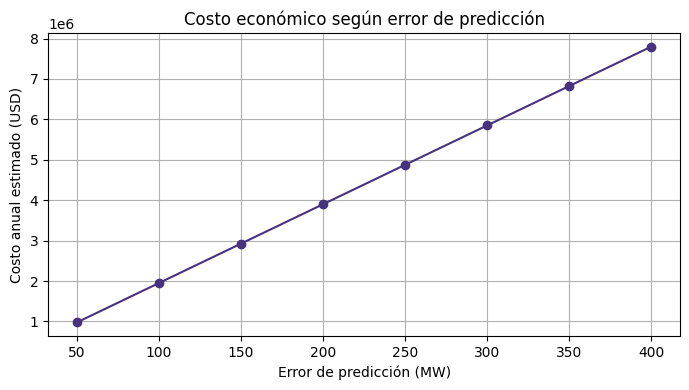

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# -------- Parámetros --------------------------
precio_eficiente = 70   # USD/MWh
precio_respaldo = 200   # USD/MWh
diferencia_precio = precio_respaldo - precio_eficiente  # 130 USD/MWh
horas_relevantes = 150  # cantidad de horas con desvíos significativos

# -------- Error en MW y cálculo de costos ------
errores_mw = list(range(50, 401, 50))  # errores entre 50 y 400 MW
costos = [e * horas_relevantes * diferencia_precio for e in errores_mw]

# -------- Tabla para mostrar datos --------------
df_error_costo = pd.DataFrame({
    'Error de predicción (MW)': errores_mw,
    'Costo económico (USD)': costos
})
display(df_error_costo)

# -------- Gráfico -------------------------------
plt.figure(figsize=(7, 4))
plt.plot(errores_mw, costos, marker='o')
plt.title('Costo económico según error de predicción')
plt.xlabel('Error de predicción (MW)')
plt.ylabel('Costo anual estimado (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


Evidencia que a mayor error en la predicción de demanda, mayor es el costo operativo por necesidad de activar energía de respaldo más cara.

**Comparación de precios por tipo de generación eléctrica**

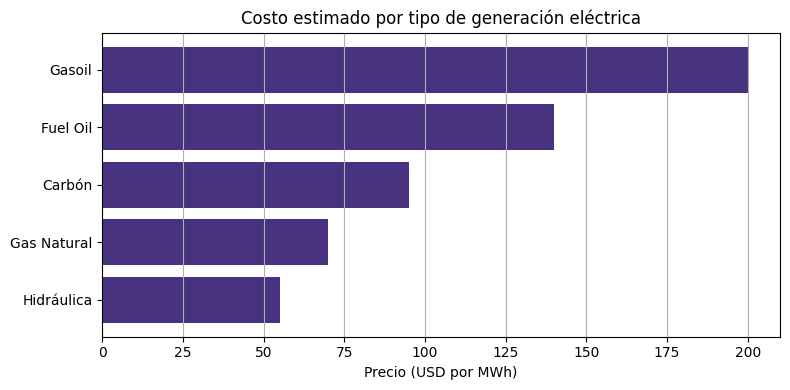

In [13]:
import matplotlib.pyplot as plt

# ------- Tipos de generación y precios estimados (USD/MWh) -------
tipos = ['Hidráulica', 'Gas Natural', 'Carbón', 'Fuel Oil', 'Gasoil']
precios = [55, 70, 95, 140, 200]  # valores aproximados

# ------- Gráfico de barras horizontal ------------------------------
plt.figure(figsize=(8, 4))
plt.barh(tipos, precios)
plt.title('Costo estimado por tipo de generación eléctrica')
plt.xlabel('Precio (USD por MWh)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Comparación visual de precios por fuente energética. Ayuda a entender por qué es fundamental evitar el uso innecesario de generación de alto costo (gasoil o fuel oil).

### Conclusion
El presente trabajo permitió analizar la demanda energética argentina utilizando datos abiertos provistos por CAMMESA, abordando tanto su comportamiento histórico como su capacidad de ser anticipada mediante modelos de ciencia de datos. El estudio reveló una estacionalidad clara y repetitiva, con picos sistemáticos en los meses de invierno (por el uso de calefacción) y en verano (por la refrigeración), lo que evidencia un patrón que puede ser modelado y aprovechado para la planificación estratégica del sistema eléctrico.

El modelo Prophet, desarrollado por Meta, demostró ser una herramienta efectiva para capturar tanto la tendencia global como las fluctuaciones estacionales de la demanda mensual. Alcanzó un MAE de 193.166 MWh y un R² de 0.9139, lo cual indica un nivel de precisión muy alto para un modelo simple, basado únicamente en datos históricos. Si bien estos resultados son sólidos, también se identifica que el rendimiento podría mejorarse incorporando variables externas como temperatura ambiental, actividad económica o feriados, que influyen directamente en el consumo energético.

El análisis por región permitió profundizar en la dinámica territorial del consumo: zonas como el Gran Buenos Aires y el Litoral mostraron una demanda estructuralmente más alta, lo que sugiere que estas áreas deben ser objeto de especial atención en términos de planificación operativa, reservas energéticas y políticas de eficiencia.

Complementando el enfoque predictivo, se aplicó clustering con K-Means para agrupar los meses según su perfil de demanda regional. Este modelo identificó tres clusters claramente diferenciados: baja, media y alta demanda. Los meses de invierno fueron sistemáticamente asignados al cluster de máxima demanda, validando así nuestra hipótesis desde una perspectiva no supervisada: los picos de consumo pueden anticiparse con base en patrones históricos y estacionales.

Desde una perspectiva económica, se demostró que el uso de un modelo predictivo puede traducirse en un ahorro estimado de 2.8 millones de dólares anuales, al reducir el uso innecesario de generación de respaldo cara (como fuel oil o gasoil) frente a una planificación más eficiente basada en datos. A través de gráficos económicos complementarios, se evidenció cómo el error de predicción impacta directamente en el costo operativo de CAMMESA y cómo un modelo efectivo permite asignar con mayor precisión las fuentes de generación más económicas (como la hidráulica o el gas natural).

Además, se visualizó cómo ese ahorro se acumula mes a mes, demostrando que el valor del modelo no es solo técnico, sino también estratégico y financiero. La implementación de herramientas analíticas como esta puede mejorar la eficiencia del sistema eléctrico nacional, reducir costos operativos, disminuir la dependencia de generación costosa, y generar decisiones más informadas en la compra de energía, contratos y reservas.

En conjunto, los resultados obtenidos validan que es posible construir una herramienta útil, visual e interactiva que ayude a los responsables del sistema eléctrico a anticipar picos de consumo, prevenir riesgos operativos y optimizar recursos. Este tipo de solución puede ser de gran utilidad para CAMMESA y otras empresas del sector, permitiendo una planificación proactiva de la generación, distribución y contratos energéticos, reduciendo costos y mejorando la seguridad del suministro.

En síntesis, el análisis de series temporales y la segmentación de patrones mensuales aportan valor concreto al negocio energético, al convertir datos históricos en conocimiento accionable para la toma de decisiones estratégicas, con un impacto económico tangible y sostenible.